In [2]:
import os
import glob
import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
from scipy import signal

# Peak detection and features measurment

#### Data uploading

In [3]:
total_df = pd.read_csv('output/output_df.csv')
print(total_df)

      reg_name        time  comp  profile_raw  profile_C  profile_ddf
0       E_0002     0.00000     2     0.338130  -0.136929          0.0
1       E_0002     1.09006     2     0.335457  -0.136929          0.0
2       E_0002     2.18012     2     0.332638  -0.136929          0.0
3       E_0002     3.27018     2     0.338880  -0.136929          0.0
4       E_0002     4.36024     2     0.338123  -0.136929          0.0
...        ...         ...   ...          ...        ...          ...
25495   E_0002  1629.63976    40     0.369226  -0.029623          0.0
25496   E_0002  1630.72982    40     0.385917  -0.029623          0.0
25497   E_0002  1631.81988    40     0.371197  -0.029623          0.0
25498   E_0002  1632.90994    40     0.368327  -0.029623          0.0
25499   E_0002  1634.00000    40     0.386546  -0.029623          0.0

[25500 rows x 6 columns]


In [11]:
print(total_df['profile_raw'][total_df['comp'] == 40])

24000    0.553946
24001    0.556776
24002    0.532155
24003    0.548633
24004    0.554366
           ...   
25495    0.369226
25496    0.385917
25497    0.371197
25498    0.368327
25499    0.386546
Name: profile_raw, Length: 1500, dtype: float64


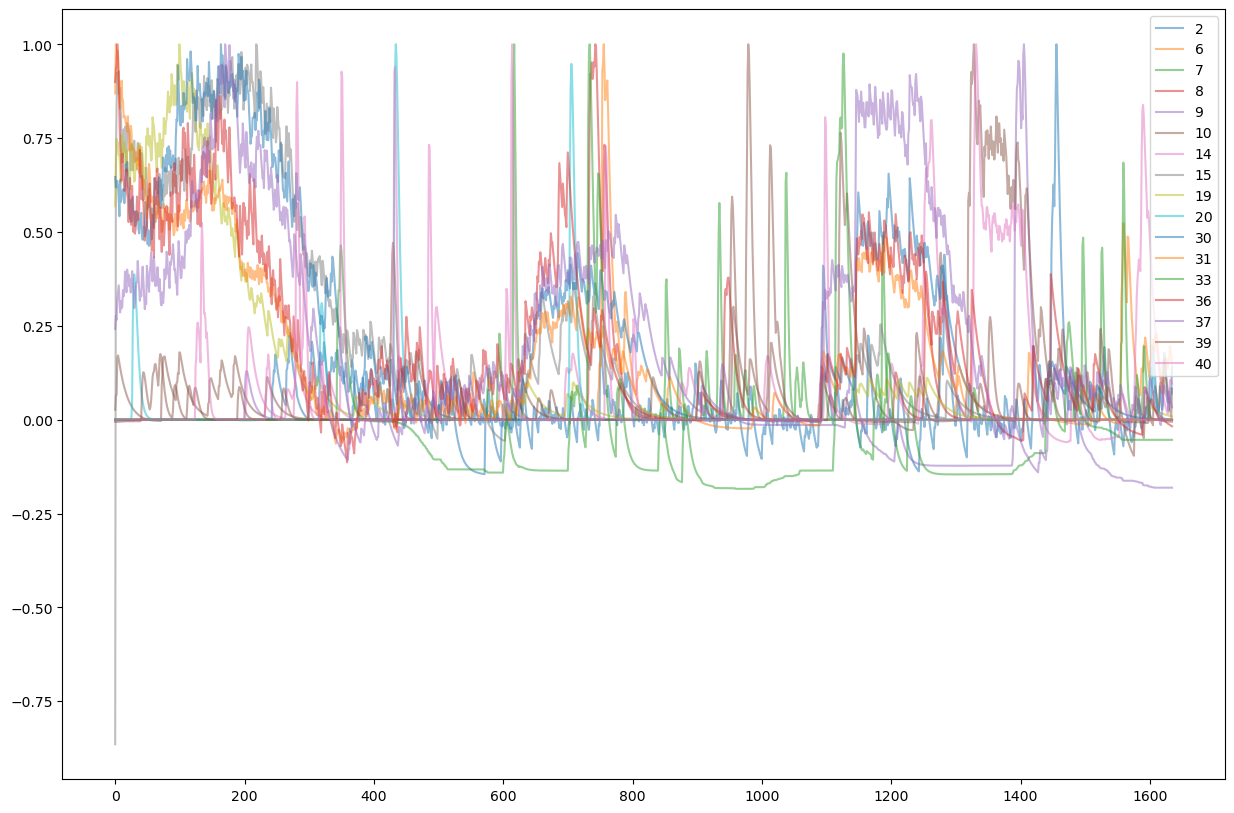

In [42]:
plt.figure(figsize=(15, 10))

for i in total_df.comp.unique():
    time_series = total_df['time'][total_df['comp'] == i]
    profile_series = total_df['profile_ddf'][total_df['comp'] == i]
    plt.plot(time_series, profile_series, alpha=.5, label=i)
plt.legend()
plt.show()

[2.17148526e-05 5.81670652e-02 7.52784893e-03 7.79588077e-03
 6.90359949e-02 6.68727515e-03 2.67740911e-02 1.00793900e-01
 1.14183347e-02 1.26930727e-01 2.61980358e-04 8.35349241e-02
 4.65790994e-02 3.76642912e-02 1.15381534e-02 7.86047604e-03
 1.57030607e-01 1.08838230e-02 1.90781784e-01 2.31498125e-02
 8.87022183e-03 6.62294260e-02 6.05254496e-03 1.26585911e-01
 2.48480444e-04 8.91231291e-03 1.61930711e-01 6.84752619e-02
 6.18640896e-03 1.11201716e-02 3.63687787e-02 2.58348930e-02
 1.06980949e-02 9.70206912e-02 2.06098260e-02 9.69860760e-03
 4.46018812e-02 6.96832892e-03 7.68757100e-03 5.59436137e-02
 9.20149761e-03 1.08265092e-01 1.14384415e-02 6.94244331e-02
 5.78874800e-04 5.47157254e-02 1.05569111e-02 1.07667968e-01
 4.12058310e-03 2.26033655e-01 4.01393628e-03 1.02229733e-02
 2.94009406e-02 3.62924889e-02 8.53102397e-03 8.76659456e-03
 3.42122090e-02 9.97008298e-03 3.76757645e-02 1.40101282e-01
 6.57893558e-03 8.40537932e-03 3.84112226e-02 2.73035145e-04
 5.26917788e-02 5.066273

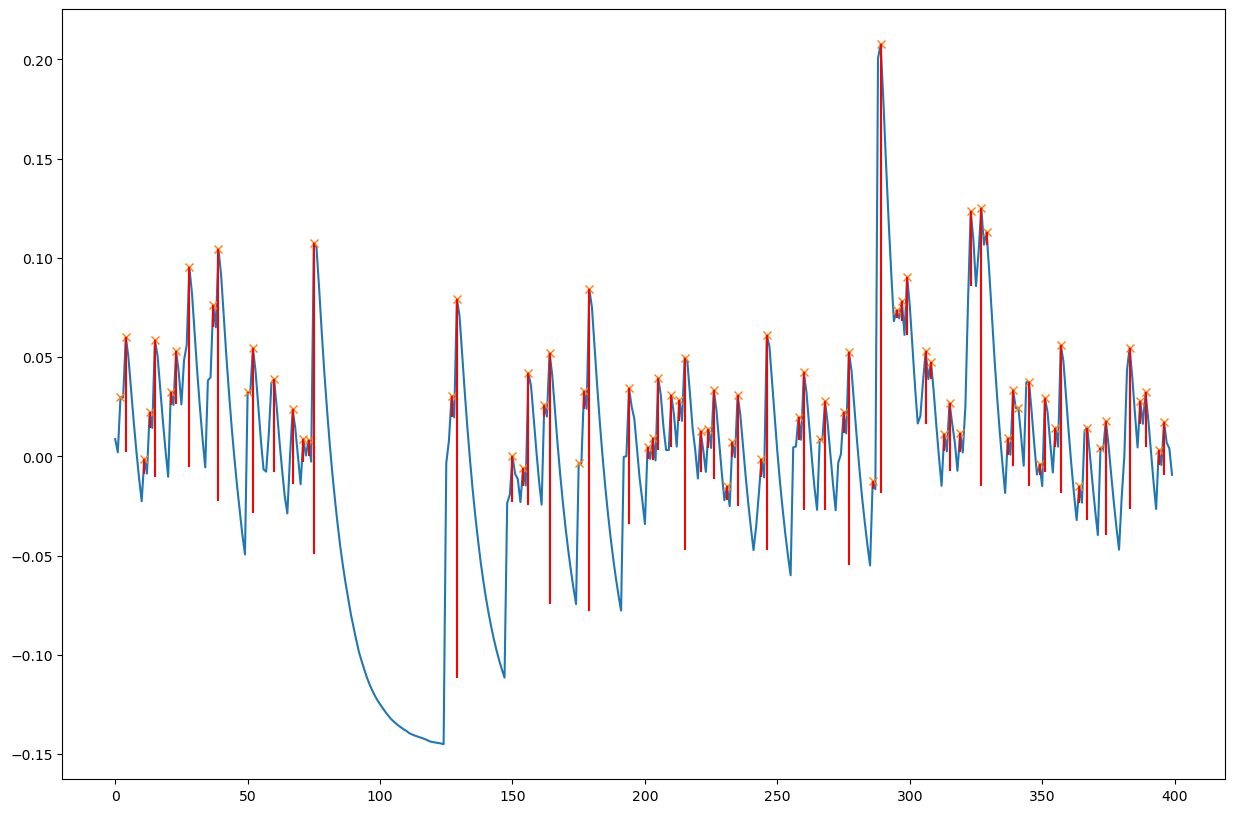

In [72]:
comp_list = np.array(total_df.comp.unique())

comp = 0
comp_profile = np.array(total_df['profile_ddf'][total_df['comp'] == comp_list[comp]])[400:800]

peaks, properties = signal.find_peaks(comp_profile)
prom = signal.peak_prominences(comp_profile, peaks, wlen=100)[0]

contour_heights = comp_profile[peaks] - prom
plt.figure(figsize=(15, 10))
plt.plot(comp_profile)
plt.plot(peaks, comp_profile[peaks], "x")
plt.vlines(x=peaks, ymin=contour_heights, ymax=comp_profile[peaks], color='red')
plt.show()